<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# HW: Stochastics

### due YYYY-MM-DD ###

HW submission by group (up to 4 people)
* John Doe <johndoe@illinois.edu>
* Jane Roe <janeroe@illinois.edu>

Note:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

## imports and graphics configurations

In [ ]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import register_matplotlib_converters

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

# **Technology** #

**Technology:** Compute $\cos(k\pi/10)$ for $k\in \{0,1,2,\dots 20\}$


# **Pairs Trading** #

**Cointegration:** Is it better to regress F on GM, or GM on F?  This is an open-ended question with no fixed correct answer. I want you to investigate, come to a conclusion, and defend it.

## Get Data

In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

ticker_A="F"
filedata_A=(ticker_A+".csv","https://drive.google.com/file/d/1c1Xz-oGxA0tmvkg5PaHRLYcS4HJtN94p/view?usp=sharing")


ticker_B="GM"
filedata_B=(ticker_B+".csv","https://drive.google.com/file/d/17OyqyKcxa6oILrrLyNVE-zs0kT--T_0-/view?usp=sharing")

color_A="red"
color_B="blue"

data_A=getfile(filedata_A).set_index("Date",drop=True)
data_A.index = pandas.to_datetime(data_A.index)
print(data_A.head(10))

local file not found; accessing Google Drive
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2022-01-03  21.270000  21.879999  21.059999  21.770000  21.082653  110449000
2022-01-04  22.520000  24.559999  22.420000  24.309999  23.542459  311645200
2022-01-05  24.059999  24.950001  23.469999  23.660000  22.912979  253540000
2022-01-06  24.090000  24.620001  23.360001  24.459999  23.687721  155058800
2022-01-07  24.670000  24.910000  24.040001  24.440001  23.668354  127017500
2022-01-10  24.100000  24.440001  23.350000  23.850000  23.096985  122800700
2022-01-11  23.780001  24.350000  23.280001  24.350000  23.581196  106011600
2022-01-12  24.610001  24.840000  24.010000  24.469999  23.697405  104050000
2022-01-13  24.639999  25.870001  24.370001  25.020000  24.230042  185780500
2022-01-14  24.469999  25.280001  24.299999  25.190001  24.394676  146012200


In [ ]:
data_B=getfile(filedata_B).set_index("Date",drop=True)
data_B.index = pandas.to_datetime(data_B.index)
print(data_B.head(10))

local file not found; accessing Google Drive
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-01-03  59.869999  61.570000  59.740002  61.169998  60.895233  20980200
2022-01-04  61.959999  65.980003  61.959999  65.739998  65.444710  44691300
2022-01-05  65.519997  67.209999  62.599998  62.740002  62.458187  43578700
2022-01-06  63.169998  63.500000  61.669998  62.869999  62.587597  20650900
2022-01-07  63.810001  63.910000  61.419998  62.270000  61.990295  17136100
2022-01-10  61.520000  62.000000  60.040001  61.070000  60.795685  18980400
2022-01-11  61.250000  61.560001  60.150002  61.459999  61.183929  16463800
2022-01-12  62.470001  62.720001  59.639999  61.029999  60.755863  20215000
2022-01-13  61.450001  63.380001  61.150002  61.770000  61.492538  19283000
2022-01-14  61.099998  61.770000  59.990002  61.099998  60.825550  16180300


In [ ]:
type(data_A)
# adj_A=data_A['Adj Close']
adj_A=pandas.Series(data_A["Adj Close"],name=ticker_A)
adj_B=pandas.Series(data_B["Adj Close"],name=ticker_B)

adj_A.head(10)


Date
2022-01-03    21.082653
2022-01-04    23.542459
2022-01-05    22.912979
2022-01-06    23.687721
2022-01-07    23.668354
2022-01-10    23.096985
2022-01-11    23.581196
2022-01-12    23.697405
2022-01-13    24.230042
2022-01-14    24.394676
Name: F, dtype: float64

In [ ]:
# IMPORTANT normalize adjA and adjB
adj_A=(adj_A-adj_A.mean())/adj_A.std()
# adj_A.head(10)

adj_B=(adj_B-adj_B.mean())/adj_B.std()

# type(adj_A)
# adj_A.head(10)
adj_B.head(10)

Date
2022-01-03    3.000635
2022-01-04    3.656746
2022-01-05    3.226039
2022-01-06    3.244702
2022-01-07    3.158561
2022-01-10    2.986278
2022-01-11    3.042270
2022-01-12    2.980535
2022-01-13    3.086776
2022-01-14    2.990585
Name: GM, dtype: float64

## Data Analysing

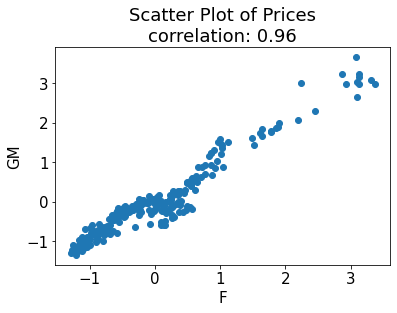

In [ ]:
corr,_=scipy.stats.pearsonr(adj_A,adj_B)
title_str="Scatter Plot of Prices\ncorrelation: {:.2f}".format(corr)
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(title_str)
# saver("scatter")
plt.show()
plt.close()

## regress F on GM

In [ ]:
slope1, intercept1, _,_,_= scipy.stats.linregress(
    adj_A,adj_B)
print("slope: "+str(slope1))
print("intercept: "+str(intercept1))
#portfolio=adj_B-adj_A*slope-intercept
#portfolio.name="Portfolio"
residual1=adj_B-(intercept1+adj_A*slope1)
residual1.name="residual1"
print(residual1.head())

# text=[]
# text.append("{0:}={1:.2f}{2:}{3:+.2f}".format(ticker_B,slope,ticker_A,intercept))
# textbox(text,"regress_formula")

slope: 0.9649524086730762
intercept: 6.069121595199383e-16
Date
2022-01-03    0.845547
2022-01-04    0.684043
2022-01-05    0.462569
2022-01-06    0.223716
2022-01-07    0.144012
Name: residual1, dtype: float64


In [ ]:
## SSE
residual1_square=residual1*residual1
SSE=residual1_square.sum()
print(SSE)


17.21671224900659


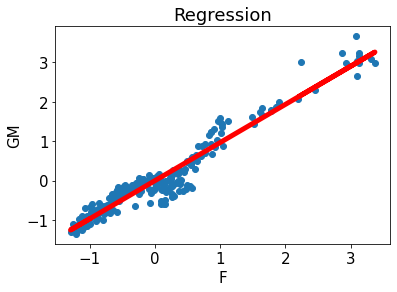

In [ ]:
plt.scatter(adj_A,adj_B,label="prices")
plt.plot(adj_A,intercept1+adj_A*slope1,color="red",label="regression")
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title("Regression")
# legend("bottom")
# saver("regression")
plt.show()
plt.close()

## Analyze residual and noise to compare which regressor model is better


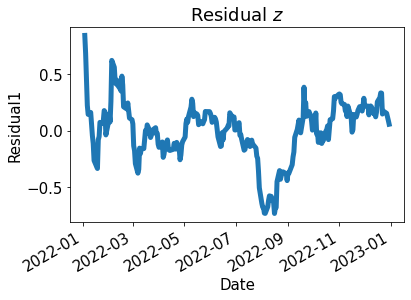

In [ ]:
plt.figure()
plt.plot(residual1.index,residual1,label="signal")
plt.ylabel("Residual1")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

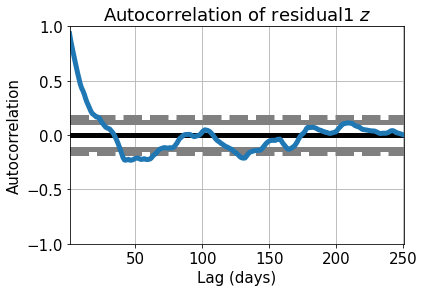

In [ ]:
plt.figure()
autocorrelation_plot(residual1)
plt.title(r"Autocorrelation of residual1 $z$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

In [ ]:
residual1_lagged=residual1.shift(periods=1)
residual1_lagged.name="residual1_lagged"
DF=pandas.concat([residual1,residual1_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

            residual1  residual1_lagged
Date                                   
2022-01-03   0.845547               NaN
2022-01-04   0.684043          0.845547
2022-01-05   0.462569          0.684043
2022-01-06   0.223716          0.462569
2022-01-07   0.144012          0.223716
            residual1  residual1_lagged
Date                                   
2022-01-04   0.684043          0.845547
2022-01-05   0.462569          0.684043
2022-01-06   0.223716          0.462569
2022-01-07   0.144012          0.223716
2022-01-10   0.161646          0.144012


In [ ]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual1_lagged"],DF["residual1"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise1=DF["residual1"]-(intercept_R+DF["residual1_lagged"]*slope_R)
noise1_std=numpy.std(noise1)
noise1_normalized=noise1/noise1_std
print("noise1 mean",numpy.mean(noise1))
print("noise1 std: ",noise1_std)

AR slope: 0.9315881205844129
AR intercept: -0.003170346126988165
noise1 mean -1.3322676295501879e-18
noise1 std:  0.07899581786512877


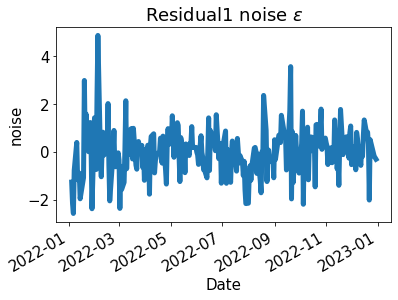

In [ ]:
plt.figure()
plt.plot(noise1_normalized.index,noise1_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title(r"Residual1 noise $\varepsilon$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

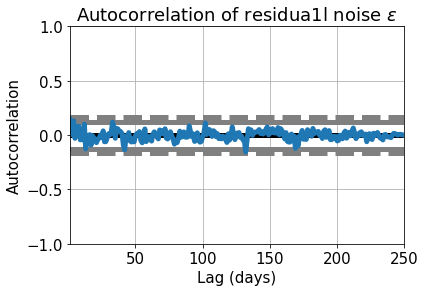

In [ ]:
plt.figure()
autocorrelation_plot(noise1_normalized)
plt.title(r"Autocorrelation of residua1l noise $\varepsilon$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

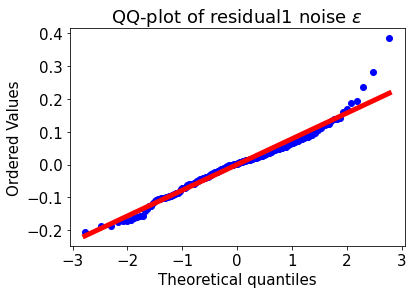

In [ ]:
scipy.stats.probplot(noise1.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual1 noise $\varepsilon$")
plt.show()
plt.close()

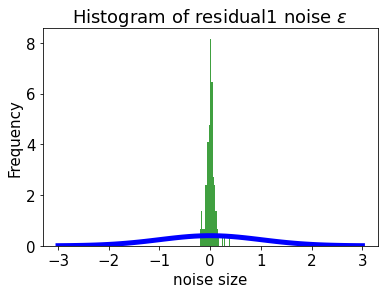

In [ ]:
xvals=numpy.linspace(start=-3,stop=3)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise1, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title(r"Histogram of residual1 noise $\varepsilon$")

plt.show()
plt.close()

## regress GM on F


In [ ]:
slope2, intercept2, _,_,_= scipy.stats.linregress(
    adj_B,adj_A)
print("slope: "+str(slope2))
print("intercept: "+str(intercept2))
#portfolio=adj_B-adj_A*slope-intercept
#portfolio.name="Portfolio"
residual2=adj_A-(intercept2+adj_B*slope2)
residual2.name="residual2"
print(residual2.head())

slope: 0.9649524086730766
intercept: -6.16833598333976e-16
Date
2022-01-03   -0.662108
2022-01-04   -0.447913
2022-01-05   -0.249133
2022-01-06   -0.000273
2022-01-07    0.076178
Name: residual2, dtype: float64


In [ ]:
## SSE
residual2_square=residual2*residual2
SSE=residual2_square.sum()
print(SSE)

17.21671224900659


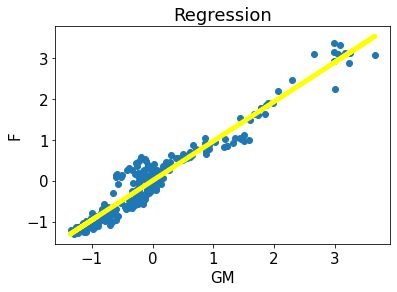

In [ ]:
plt.scatter(adj_B,adj_A,label="prices")
plt.plot(adj_B,intercept2+adj_B*slope2,color="yellow",label="regression")
plt.xlabel(ticker_B)
plt.ylabel(ticker_A)
plt.title("Regression")
# legend("bottom")
# saver("regression")
plt.show()
plt.close()

## Analyze residual and noise to compare which regressor model is better


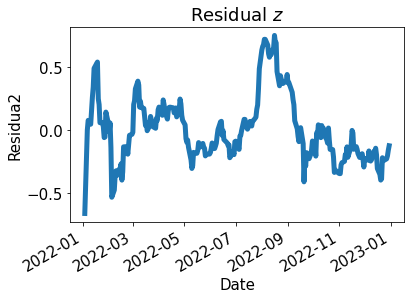

In [ ]:
plt.figure()
plt.plot(residual2.index,residual2,label="signal")
plt.ylabel("Residua2")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
# saver("residual")
plt.show()
plt.close()

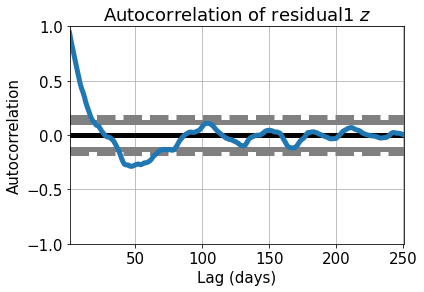

In [ ]:
plt.figure()
autocorrelation_plot(residual2)
plt.title(r"Autocorrelation of residual1 $z$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

In [ ]:
residual2_lagged=residual2.shift(periods=1)
residual2_lagged.name="residual2_lagged"
DF=pandas.concat([residual2,residual2_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

            residual2  residual2_lagged
Date                                   
2022-01-03  -0.662108               NaN
2022-01-04  -0.447913         -0.662108
2022-01-05  -0.249133         -0.447913
2022-01-06  -0.000273         -0.249133
2022-01-07   0.076178         -0.000273
            residual2  residual2_lagged
Date                                   
2022-01-04  -0.447913         -0.662108
2022-01-05  -0.249133         -0.447913
2022-01-06  -0.000273         -0.249133
2022-01-07   0.076178         -0.000273
2022-01-10   0.045608          0.076178


In [ ]:
slope_R2, intercept_R2, _, _, _ = scipy.stats.linregress(
    DF["residual2_lagged"],DF["residual2"])
print("AR slope: "+str(slope_R2))
print("AR intercept: "+str(intercept_R2))
noise2=DF["residual2"]-(intercept_R2+DF["residual2_lagged"]*slope_R2)
noise2_std=numpy.std(noise2)
noise2_normalized=noise2/noise2_std
print("noise2 mean",numpy.mean(noise2))
print("noise2 std: ",noise2_std)

AR slope: 0.9395179484969529
AR intercept: 0.002177587248172499
noise2 mean 2.220446049250313e-18
noise2 std:  0.07983470790401367


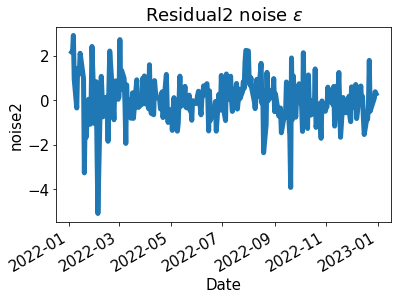

In [ ]:
plt.figure()
plt.plot(noise2_normalized.index,noise2_normalized,label="dW")
# plt.plot(noise1_normalized.index,noise1_normalized,label="dW",color="red")
plt.ylabel("noise2")
plt.xlabel("Date")
plt.title(r"Residual2 noise $\varepsilon$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

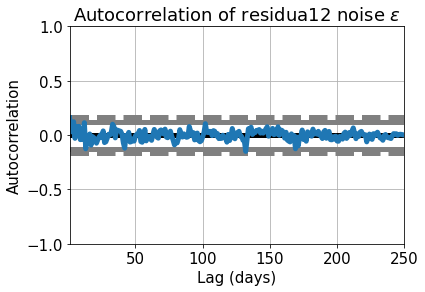

In [ ]:
plt.figure()
autocorrelation_plot(noise2_normalized)
plt.title(r"Autocorrelation of residua12 noise $\varepsilon$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

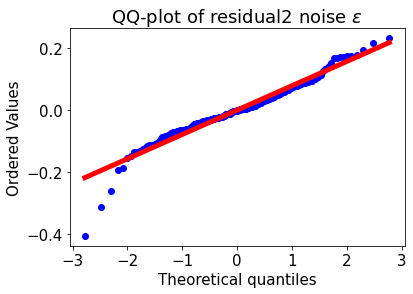

In [ ]:
scipy.stats.probplot(noise2.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual2 noise $\varepsilon$")

plt.show()
plt.close()

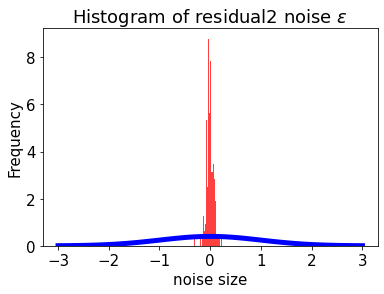

In [ ]:
xvals2=numpy.linspace(start=-3,stop=3)
fvals2=scipy.stats.norm.pdf(xvals2)
plt.figure()
plt.hist(noise2, 50, facecolor='red', alpha=0.75,density=True,label="empirical")
plt.plot(xvals2,fvals2,label="standard Gaussian",color="blue")
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title(r"Histogram of residual2 noise $\varepsilon$")

plt.show()
plt.close()

## Conclusoion

In general, if the advantages and disadvantages of the two models are measured in the traditional linear regression method, there is almost no difference between the two models as they have the same SSE.

So the question is how do we define whether this regression model is good or bad.
According to the pictures above, we can find that regress GM on F can have a better effect, because the noise based on this regression model are more condensed. From our point of view, it is an important symbol for the pros of the model